In [2]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq , os
from qiskit.providers.fake_provider import *
import numpy as np

In [3]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, 5)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.athens.fake_athens.FakeAthensV2,
 qiskit.providers.fake_provider.backends.poughkeepsie.fake_poughkeepsie.FakePoughkeepsieV2,
 qiskit.providers.fake_provider.backends.geneva.fake_geneva.FakeGeneva,
 qiskit.providers.fake_provider.backends.sydney.fake_sydney.FakeSydneyV2,
 qiskit.providers.fake_provider.backends.nairobi.fake_nairobi.FakeNairobiV2]

In [4]:
benchmarks = [
    (supermarq.bit_code.BitCode(3, 3, [1, 0, 1]), "bitcode3"),
    (supermarq.ghz.GHZ(3), "ghz3"),
    (supermarq.hamiltonian_simulation.HamiltonianSimulation(3), "hsim3"),
    (supermarq.mermin_bell.MerminBell(3), "marmin_bell_3"),
    (supermarq.qaoa_fermionic_swap_proxy.QAOAFermionicSwapProxy(3), "qaoa_swap_proxy3"),
    (supermarq.qaoa_vanilla_proxy.QAOAVanillaProxy(3), "qaoa_vanilla_proxy3"),]  

for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print(i[1],"\n")
    print(circuit.draw())

bitcode3 

              ┌───┐                                                    ┌─┐     »
         q_0: ┤ X ├──■─────────────────■────────────────────■──────────┤M├─────»
              └───┘┌─┴─┐┌───┐┌─┐     ┌─┴─┐┌───┐   ┌─┐     ┌─┴─┐┌───┐   └╥┘     »
         q_1: ─────┤ X ├┤ X ├┤M├─|0>─┤ X ├┤ X ├───┤M├─|0>─┤ X ├┤ X ├────╫──────»
                   └───┘└─┬─┘└╥┘     └───┘└─┬─┘   └╥┘     └───┘└─┬─┘    ║      »
         q_2: ──■─────────■───╫────────■────■──────╫────────■────■──────╫──────»
              ┌─┴─┐┌───┐ ┌─┐  ║      ┌─┴─┐┌───┐┌─┐ ║      ┌─┴─┐┌───┐┌─┐ ║      »
         q_3: ┤ X ├┤ X ├─┤M├──╫──|0>─┤ X ├┤ X ├┤M├─╫──|0>─┤ X ├┤ X ├┤M├─╫──|0>─»
              ├───┤└─┬─┘ └╥┘  ║      └───┘└─┬─┘└╥┘ ║      └───┘└─┬─┘└╥┘ ║  ┌─┐ »
         q_4: ┤ X ├──■────╫───╫─────────────■───╫──╫─────────────■───╫──╫──┤M├─»
              └───┘       ║   ║                 ║  ║                 ║  ║  └╥┘ »
    m_mcm0: 2/════════════╩═══╩═════════════════╬══╬═════════════════╬══╬═══╬══»
                 

In [5]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'bitcode3': [0.4, 0.5, 0.8571428571428571, 0.6142857142857143, 0.46153846153846156, 0.0], 'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'hsim3': [0.6666666666666666, 1.0, 0.26666666666666666, 0.7333333333333333, 0.0, 0.25], 'marmin_bell_3': [1.0, 1.0, 0.4375, 0.6666666666666666, 0.0, 0.11538461538461542], 'qaoa_swap_proxy3': [0.6666666666666666, 1.0, 0.5, 0.6666666666666666, 0.0, 0.09999999999999998], 'qaoa_vanilla_proxy3': [1.0, 1.0, 0.4, 0.6666666666666666, 0.0, 0.125]}


In [6]:
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("------------------------BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        job = backend().run(circuit, shots=1000)
        result=job.result()
        counts = job.result(0).get_counts()
        score = benchmark.score(counts)
        print(label," :: ",score)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,backend,job,score))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_athens
bitcode3  ::  0.0
ghz3  ::  0.94499761904162
hsim3  ::  0.9704466094067259
marmin_bell_3  ::  0.4955
qaoa_swap_proxy3  ::  0.9320000128035575
qaoa_vanilla_proxy3  ::  0.9486708826378495
------------------------BACKEND-NAME ::  fake_poughkeepsie
bitcode3  ::  0.0
ghz3  ::  0.8415857055411432
hsim3  ::  0.929446609406726
marmin_bell_3  ::  0.48350000000000004
qaoa_swap_proxy3  ::  0.8480000103139769
qaoa_vanilla_proxy3  ::  0.8760035331467267
------------------------BACKEND-NAME ::  fake_geneva
bitcode3  ::  0.0
ghz3  ::  0.9069997243659581
hsim3  ::  0.9601132760733926
marmin_bell_3  ::  0.4845
qaoa_swap_proxy3  ::  0.9180000123886274
qaoa_vanilla_proxy3  ::  0.9326707322911802
------------------------BACKEND-NAME ::  fake_sydney
bitcode3  ::  0.0
ghz3  ::  0.9089865234525661
hsim3  ::  0.967446609406726
marmin_bell_3  ::  0.481
qaoa_swap_proxy3  ::  0.8960000117365943
qaoa_vanilla_

In [7]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

In [ ]:
for label,benchmark,backend,job,score in jobs:
    #backend=backend().name
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label,"; COUNTS :", counts, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

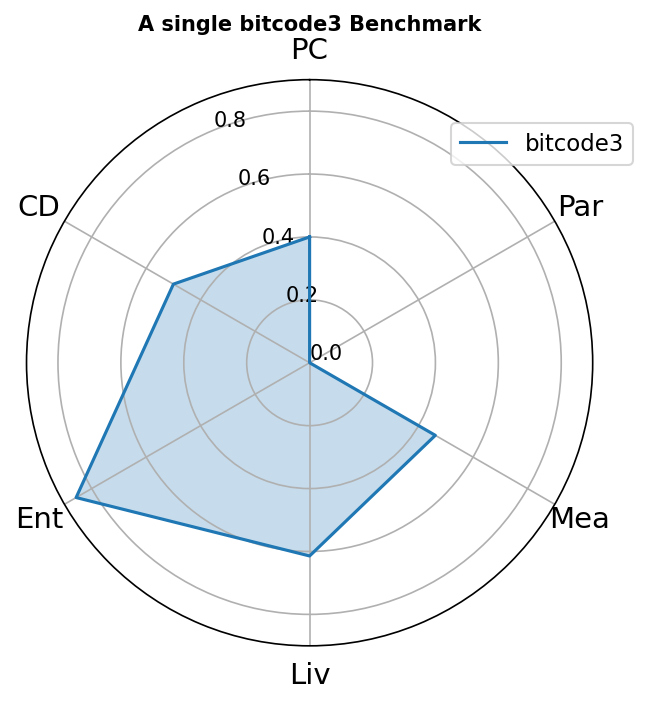

-----------------------------------------------------------


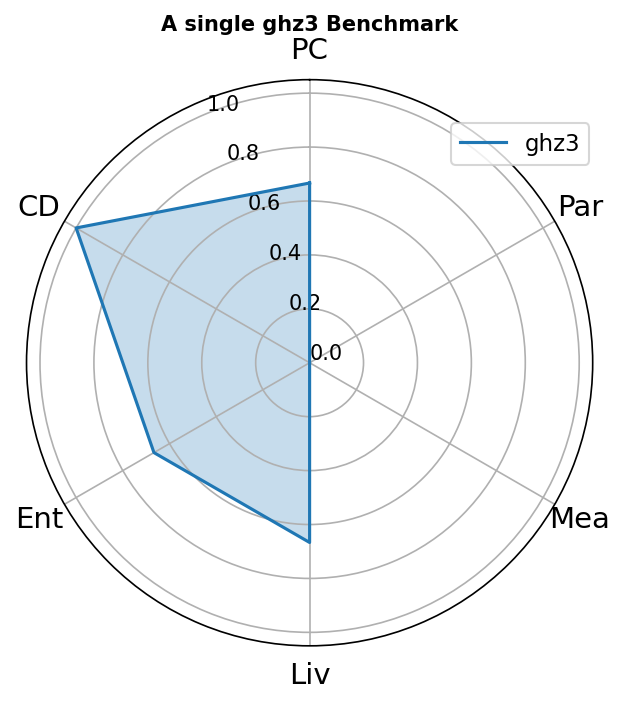

-----------------------------------------------------------


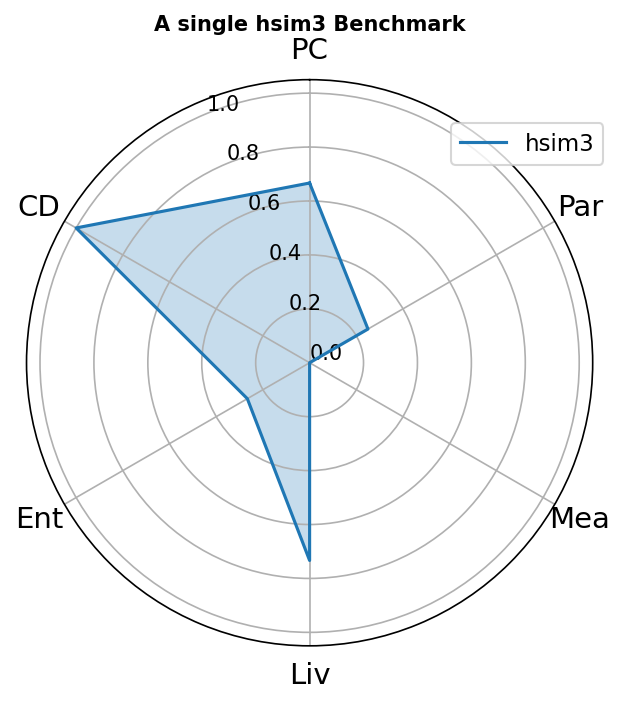

-----------------------------------------------------------


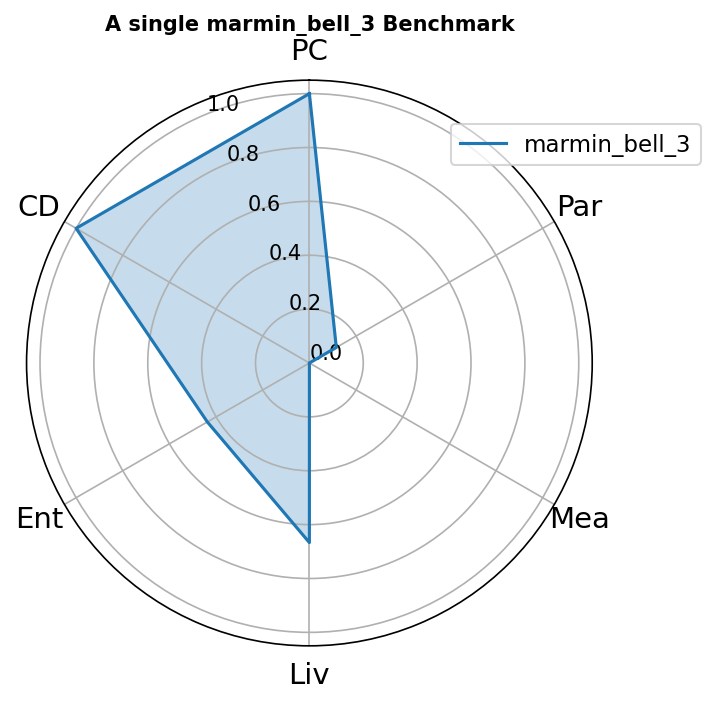

-----------------------------------------------------------


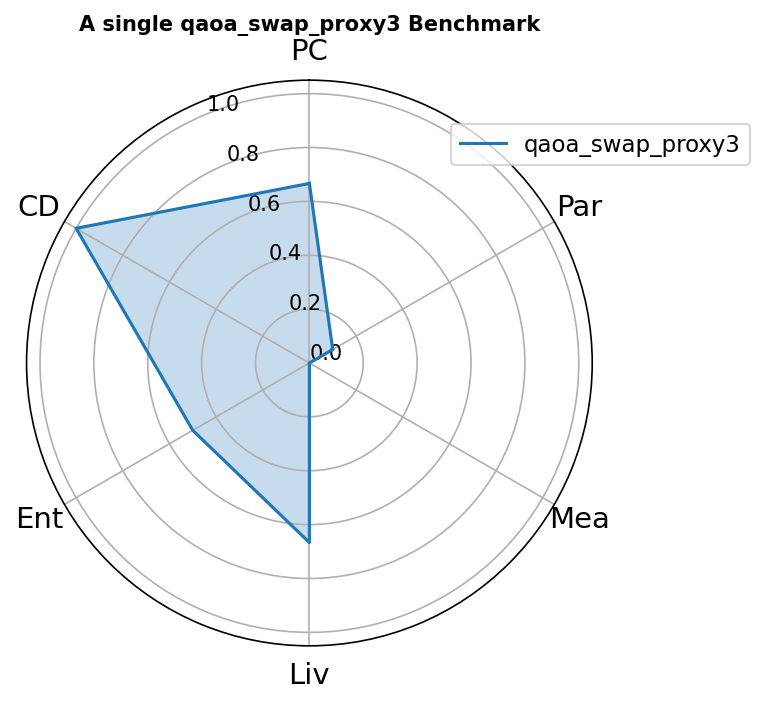

-----------------------------------------------------------


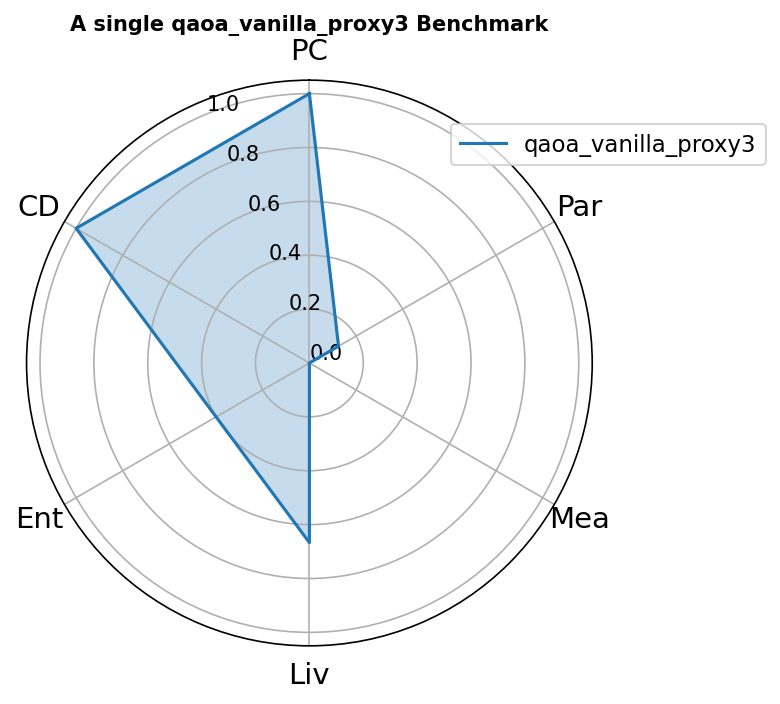

-----------------------------------------------------------


In [9]:
for label, scores in benchmark_features.items(): 
    r="A single "+label+" Benchmark"
    supermarq.plotting.plot_benchmark(
    [r, [label], [scores]],
    spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
    )
    print("-----------------------------------------------------------")

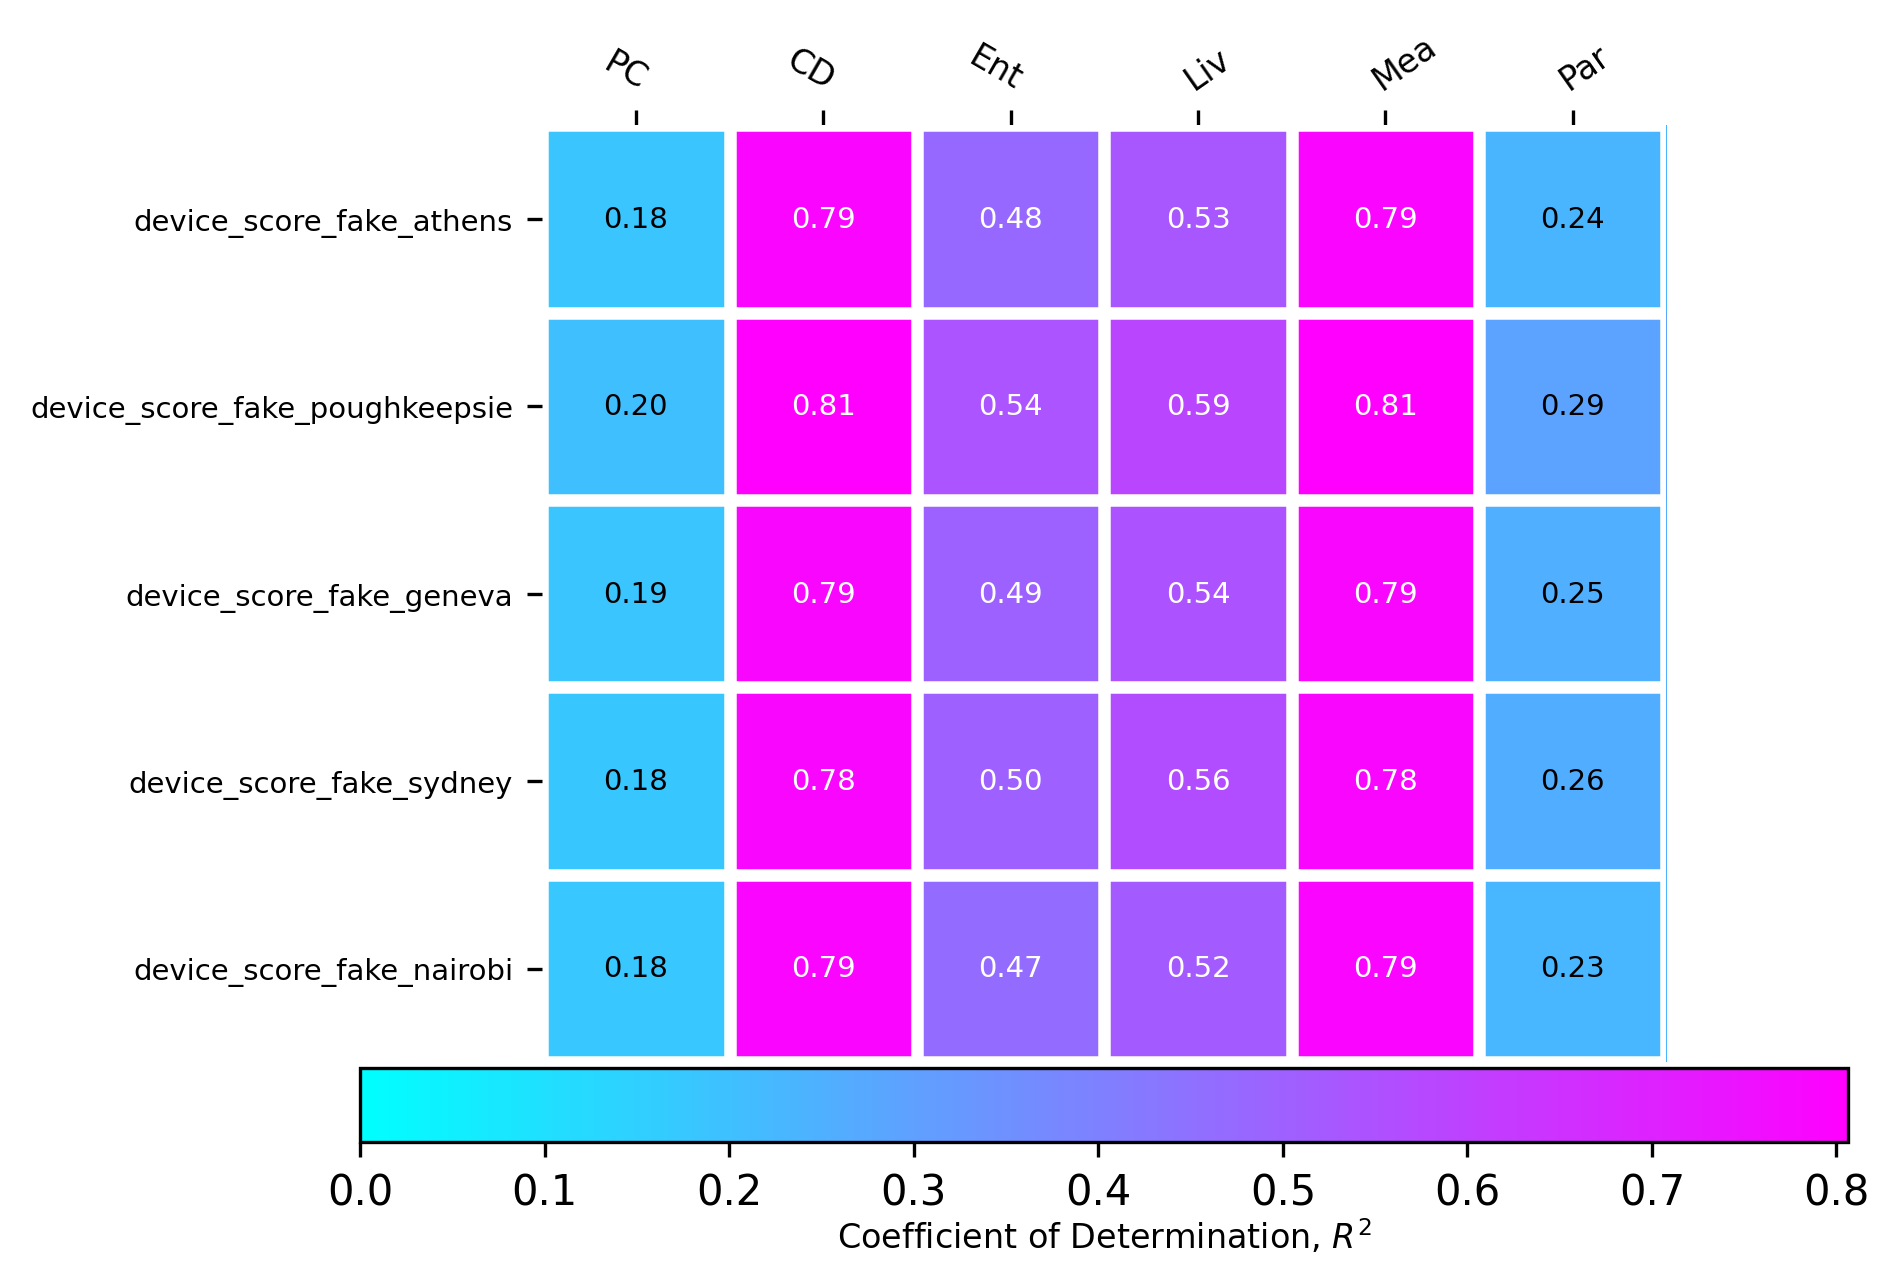

In [12]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)